In [19]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
df = pd.read_csv(r"C:\Users\ramiu\Desktop\Python\Data Science Assesment\Machine Learning Question Answer\Question1_Instagram_Reach_Prediction\instagram_reach.csv")

In [21]:
# Check the data types of the columns
print(df.dtypes)

# Check the summary statistics of the numerical columns
print(df.describe())

# Check the correlation matrix of the numerical columns
print(df.corr())

Unnamed: 0            int64
S.No                  int64
USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted    object
Likes                 int64
dtype: object
       Unnamed: 0        S.No   Followers      Likes
count  100.000000  100.000000   100.00000  100.00000
mean     8.940000   16.240000   961.96000   46.48000
std      6.639064    7.384286  1014.62567   55.08698
min      0.000000    1.000000    11.00000    8.00000
25%      4.000000   10.750000   252.75000   19.00000
50%      8.000000   16.500000   612.00000   29.00000
75%     12.250000   22.250000  1197.00000   46.00000
max     26.000000   30.000000  4496.00000  349.00000


ValueError: could not convert string to float: 'mikequindazzi'

#  EDA

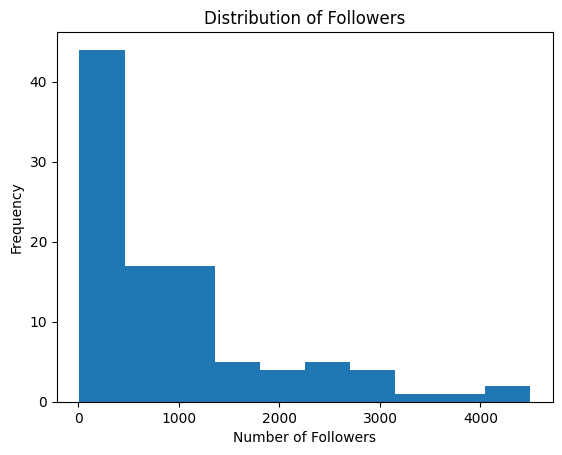

In [22]:
# Plot a histogram of the number of followers
plt.hist(df['Followers'])
plt.title('Distribution of Followers')
plt.xlabel('Number of Followers')
plt.ylabel('Frequency')
plt.show()

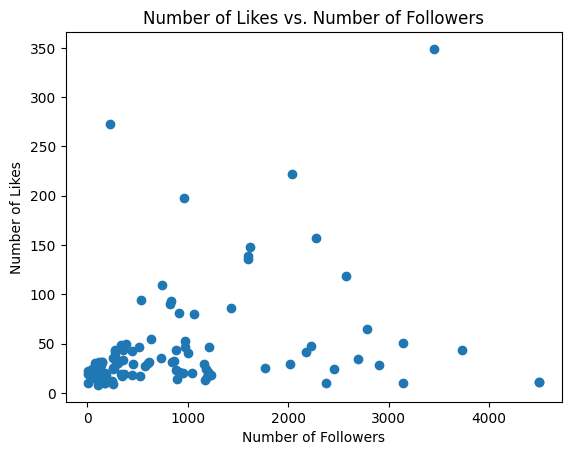

In [23]:
# Plot a scatterplot of the number of followers vs. number of likes
plt.scatter(df['Followers'], df['Likes'])
plt.title('Number of Likes vs. Number of Followers')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Likes')
plt.show()

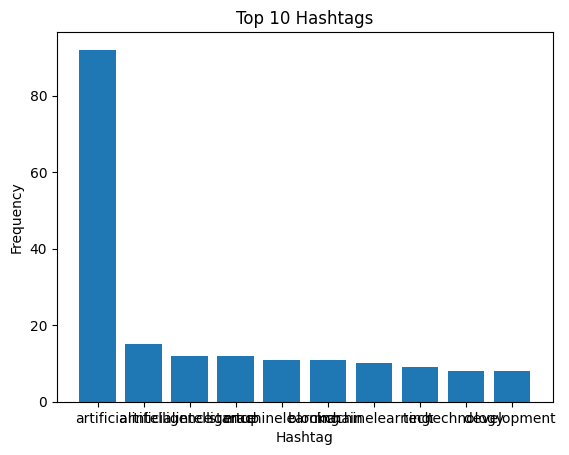

In [24]:
# Plot a bar chart of the top 10 hashtags
hashtags = df['Hashtags'].str.split('#', expand=True).stack().value_counts()[:10]
plt.bar(hashtags.index, hashtags.values)
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.show()

# Feature Engineering


In [27]:
# Create a new column for the number of hashtags in the caption
df['Hashtag Count'] = df['Hashtags'].str.count('#')

# Create a new column for the number of words in the caption
df['Word Count'] = df['Caption'].str.split().str.len()

# Replace non-datetime values with the current datetime
df['Time since posted'] = pd.to_datetime(df['Time since posted'], errors='coerce')
df['Time since posted'] = df['Time since posted'].fillna(pd.Timestamp.now())

# Create a new column for the time since the post was made
df['Time Since Posted'] = pd.to_datetime('2022-03-01') - df['Time since posted']
df['Time Since Posted'] = df['Time Since Posted'].dt.days
# Create a new column for the number of unique hashtags in the caption
df['Unique Hashtags'] = df['Hashtags'].str.split('#').apply(lambda x: len(set(x)))

# Create a new column for the number of mentions (@username) in the caption
df['Mention Count'] = df['Caption'].str.count('@')

# Create a new column for the number of URLs in the caption
df['URL Count'] = df['Caption'].str.count('http')

# Drop any rows with missing values
df.dropna(inplace=True)

C:\Users\ramiu\AppData\Local\Temp\ipykernel_16592\2484265685.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time since posted'] = pd.to_datetime(df['Time since posted'], errors='coerce')


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer

# Assuming df is your dataframe

# Convert 'Likes' column to numeric
df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce')

# Drop rows with NaN values in 'Likes' column
df.dropna(subset=['Likes'], inplace=True)

# Split the data into training and testing sets
X = df.drop(['S.No', 'USERNAME', 'Caption', 'Likes', 'Time since posted'], axis=1)
y = df['Likes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Extract the hashtags from each post and create a list of hashtags
hashtags = []
for i in range(len(df)):
    post_hashtags = df.iloc[i, df.columns.get_loc('Hashtags')]
    hashtags.extend(post_hashtags.split('#'))

# Remove empty strings and non-alphanumeric characters from the list of hashtags
hashtags = [tag.lower().replace('\xa0', '').strip() for tag in hashtags if tag]

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Convert the list of hashtags into a matrix of frequencies
hashtag_matrix = vectorizer.fit_transform(hashtags)

# Convert the sparse hashtag matrix to a dense matrix
hashtag_matrix_dense = hashtag_matrix.toarray()

# Add the hashtag matrix to the X dataframe as a new set of features
X_hashtag = pd.DataFrame(hashtag_matrix_dense, columns=vectorizer.get_feature_names_out())
X_train_hashtag = X_hashtag.iloc[:len(X_train), :]
X_test_hashtag = X_hashtag.iloc[len(X_train):, :]
X_train = pd.concat([X_train, X_train_hashtag], axis=1)
X_test = pd.concat([X_test, X_test_hashtag], axis=1)

# Print the number of hashtag features added to the X dataframe
print('Number of hashtag features:', len(vectorizer.get_feature_names_out()))

# Train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Evaluate the model on the testing set
lr_score = lr_model.score(X_test, y_test)

print('Linear Regression Score:', lr_score)



Number of hashtag features: 1108


ValueError: could not convert string to float: 'thebeautymindset#businessman#quoteoftheday\xa0#businessowner#businesswoman\xa0#success\xa0#grind#motivation\xa0#motivational\xa0#lifestyle#happiness\xa0#entrepreneurs#entrepreneurlife\xa0#business #working\xa0#founder#startup\xa0#money\xa0#magazine\xa0#moneymaker#startuplife #successful\xa0#passion\xa0#inspiredaily#hardwork\xa0#hardworkpaysoff\xa0#desire'